In [1]:
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
#pip install tensorflow-addons

In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator

In [4]:
'''
import skimage
from skimage.io import imread,imshow
path = r'D:\new_leuk\Leukemia_Work_Revive\Autoencoder oversample data\val\all'

im_list = os.listdir(path)
len(im_list)

for x in range(len(im_list)):
    im = imread(os.path.join(path, im_list[x]))
    maxi = np.max(im)
    mini = np.min(im)
    if str(im.dtype) != 'uint8':
        print(path+im_list[x])
'''

"\nimport skimage\nfrom skimage.io import imread,imshow\npath = r'D:\new_leuk\\Leukemia_Work_Revive\\Autoencoder oversample data\x0bal\x07ll'\n\nim_list = os.listdir(path)\nlen(im_list)\n\nfor x in range(len(im_list)):\n    im = imread(os.path.join(path, im_list[x]))\n    maxi = np.max(im)\n    mini = np.min(im)\n    if str(im.dtype) != 'uint8':\n        print(path+im_list[x])\n"

In [5]:
'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Autoencoder oversample data\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Autoencoder oversample data\val'
BATCH_SIZE=10
r = 4
c = 4
'''
'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Aug_10x\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Aug_10x\val'
BATCH_SIZE=10
r = 4
c = 4
'''
'''
TRAIN_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Oversampled minority class\train'
VAL_PATH = r'D:\new_leuk\Leukemia_Work_Revive\Oversampled minority class\val'
BATCH_SIZE=10
r = 4
c = 4
'''

#'''
TRAIN_PATH = r'D:\Leuk Dataset\new fol\train'
VAL_PATH = r'D:\Leuk Dataset\new fol\val'
BATCH_SIZE=10
r = 4
c = 4
#'''


In [6]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    im = img[slices].astype('float32')
    return im


def crop_generator(batches, crop_length):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = crop_center(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [7]:
#'''
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary', 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  target_size=(450, 450),
                                                  shuffle=True,
                                                  seed=42
                                                  )

train_crops = crop_generator(train_batches, 210)
#'''
'''

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary', 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  target_size=(210, 210),
                                                  shuffle=True,
                                                  seed=42
                                                  )

'''

Found 10661 images belonging to 2 classes.


'\n\ntrain_datagen = ImageDataGenerator(rescale=1.0/255.0)\ntrain_batches = train_datagen.flow_from_directory(TRAIN_PATH,\n                                                  class_mode=\'binary\', \n                                                  color_mode="rgb", \n                                                  batch_size=BATCH_SIZE, \n                                                  target_size=(210, 210),\n                                                  shuffle=True,\n                                                  seed=42\n                                                  )\n\n'

'\n\ntrain_batches\nx , y = next(train_batches)\nprint(x.shape)\nplt.figure(figsize=(15,15))\ni=0\nfor img in x:\n    plt.subplot(r,c,i+1)\n    plt.imshow(img)\n    i+=1\n'

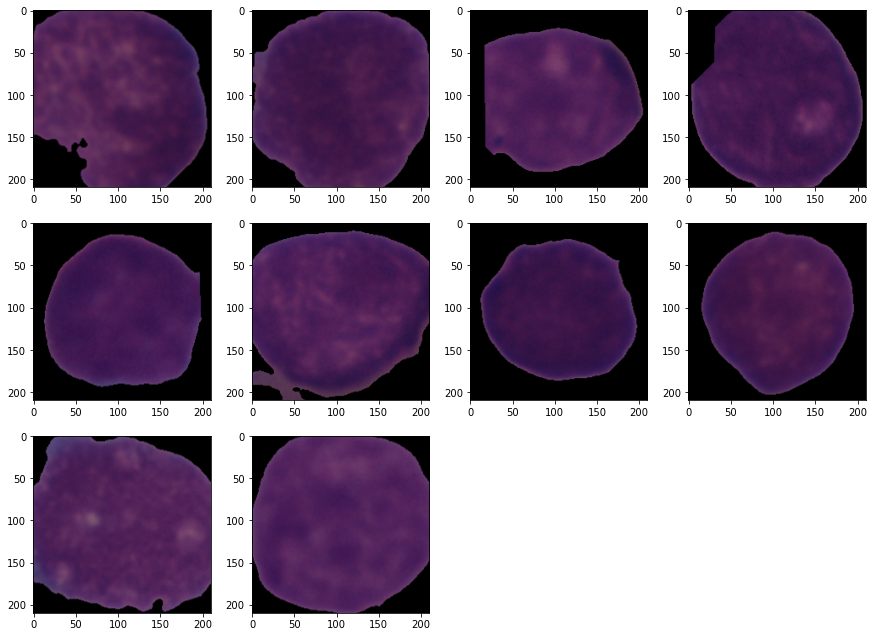

In [8]:
#'''
train_crops
x , y = next(train_crops)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
#'''
'''

train_batches
x , y = next(train_batches)
print(x.shape)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
'''

In [9]:
#'''
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_batches = val_datagen.flow_from_directory(VAL_PATH,
                                                class_mode='binary', 
                                                color_mode="rgb", 
                                                batch_size=BATCH_SIZE, 
                                                target_size=(450, 450),
                                                shuffle=True,
                                                seed=42
                                                )

val_crops = crop_generator(val_batches, 210)
#'''
'''

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_batches = val_datagen.flow_from_directory(VAL_PATH,
                                                class_mode='binary', 
                                                color_mode="rgb", 
                                                batch_size=BATCH_SIZE, 
                                                target_size=(210, 210),
                                                shuffle=True,
                                                seed=42
                                                )
'''

Found 1867 images belonging to 2 classes.


'\n\nval_datagen = ImageDataGenerator(rescale=1.0/255.0)\nval_batches = val_datagen.flow_from_directory(VAL_PATH,\n                                                class_mode=\'binary\', \n                                                color_mode="rgb", \n                                                batch_size=BATCH_SIZE, \n                                                target_size=(210, 210),\n                                                shuffle=True,\n                                                seed=42\n                                                )\n'

'\nval_batches\nx , y = next(val_batches)\nprint(x.shape)\nplt.figure(figsize=(15,15))\ni=0\nfor img in x:\n    plt.subplot(r,c,i+1)\n    plt.imshow(img)\n    i+=1\n'

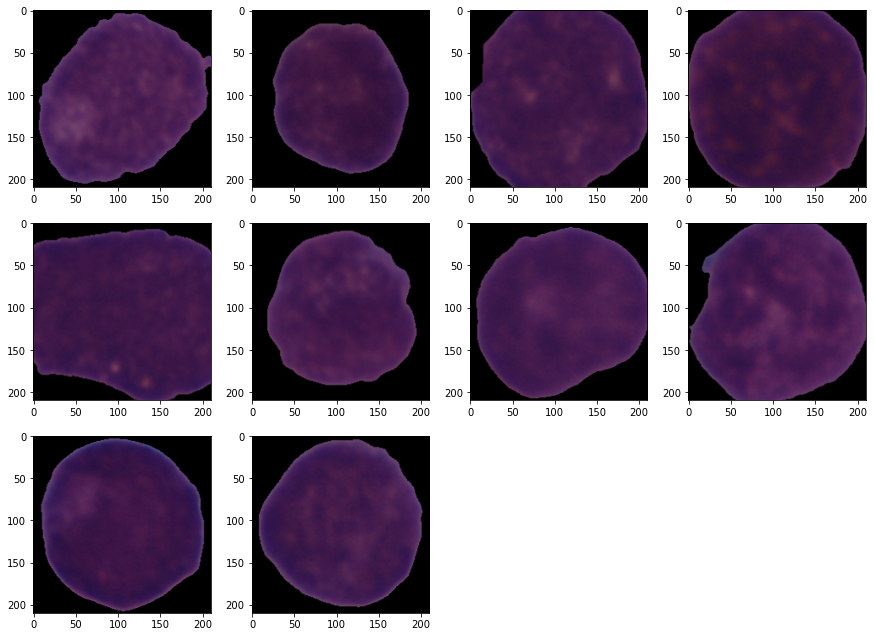

In [10]:
#'''
val_crops
x , y = next(val_crops)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
#'''

'''
val_batches
x , y = next(val_batches)
print(x.shape)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1
'''

In [11]:
'''
import tensorflow as tf

resnet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.applications.ResNet50(
        weights='imagenet', 
        input_shape=(224,224,3),
        pooling="avg",
        classifier_activation=None
        )
    ])
'''

'\nimport tensorflow as tf\n\nresnet = tf.keras.Sequential([\n    tf.keras.layers.Input(shape=(224,224,3)),\n    tf.keras.applications.ResNet50(\n        weights=\'imagenet\', \n        input_shape=(224,224,3),\n        pooling="avg",\n        classifier_activation=None\n        )\n    ])\n'

In [12]:
'''
#import tensorflow.keras as keras
#import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16
model = VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=2,
    classifier_activation='softmax'
)
model.summary()
'''

"\n#import tensorflow.keras as keras\n#import tensorflow.keras as keras\nfrom tensorflow.keras.applications import VGG16\nmodel = VGG16(\n    include_top=True,\n    weights=None,\n    input_tensor=None,\n    input_shape=(210,210,3),\n    pooling=None,\n    classes=2,\n    classifier_activation='softmax'\n)\nmodel.summary()\n"

In [13]:
'''
import tensorflow as tf
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
model.summary()
'''

#'''
import tensorflow as tf
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
model.summary()
#'''

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 210, 210, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 216, 216, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 105, 105, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 105, 105, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:
'''
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
model  = define_model()
model.summary()
from keras.applications import VGG16
# include_top=True,
# weights="imagenet",
#input_tensor=None,
#input_shape=None,
#pooling=None,
#classes=1000,
#classifier_activation="softmax",
model = VGG16(include_top=True,weights=None,input_tensor=None,input_shape=None,pooling=None,classes=1,classifier_activation="sigmoid",)
'''

'\nfrom keras.models import Sequential\nfrom keras.layers import Conv2D, MaxPooling2D, Flatten, Dense\nfrom keras.optimizers import SGD\n\n# define cnn model\ndef define_model():\n    model = Sequential()\n    model.add(Conv2D(32, (3, 3), activation=\'relu\', kernel_initializer=\'he_uniform\', padding=\'same\', input_shape=(200, 200, 3)))\n    model.add(MaxPooling2D((2, 2)))\n    model.add(Flatten())\n    model.add(Dense(128, activation=\'relu\', kernel_initializer=\'he_uniform\'))\n    model.add(Dense(1, activation=\'sigmoid\'))\n    # compile model\n    opt = SGD(lr=0.001, momentum=0.9)\n    model.compile(optimizer=opt, loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    return model\nmodel  = define_model()\nmodel.summary()\nfrom keras.applications import VGG16\n# include_top=True,\n# weights="imagenet",\n#input_tensor=None,\n#input_shape=None,\n#pooling=None,\n#classes=1000,\n#classifier_activation="softmax",\nmodel = VGG16(include_top=True,weights=None,input_tensor=None,inp

In [15]:
#tf.compat.v1.enable_eager_execution()
import tensorflow as tf
tf.executing_eagerly()

True

In [16]:
# example of tending the vgg16 model
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Flatten
'''
import tensorflow as tf
# load model without classifier layers
model = tf.keras.applications.VGG16(include_top=False, input_shape=(210, 210, 3))
# add new classifier layers
flat1 = tf.keras.layers.Flatten()(model.layers[-1].output)
class1 = tf.keras.layers.Dense(4096, activation='relu')(flat1)
class2 = tf.keras.layers.Dense(4096, activation='relu')(class1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(class2)
# define new model
model = tf.keras.Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
'''

"\nimport tensorflow as tf\n# load model without classifier layers\nmodel = tf.keras.applications.VGG16(include_top=False, input_shape=(210, 210, 3))\n# add new classifier layers\nflat1 = tf.keras.layers.Flatten()(model.layers[-1].output)\nclass1 = tf.keras.layers.Dense(4096, activation='relu')(flat1)\nclass2 = tf.keras.layers.Dense(4096, activation='relu')(class1)\noutput = tf.keras.layers.Dense(1, activation='sigmoid')(class2)\n# define new model\nmodel = tf.keras.Model(inputs=model.inputs, outputs=output)\n# summarize\nmodel.summary()\n"

In [17]:
'''
from keras import backend as K
def binary_focal_loss(gamma=2, alpha=0.25):
    """
    Binary form of focal loss.
         Focal loss for binary classification problems
    
    focal_loss(p_t) = -alpha_t * (1 - p_t)**gamma * log(p_t)
        where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    alpha = tf.constant(alpha, dtype=tf.float32)
    gamma = tf.constant(gamma, dtype=tf.float32)

    def binary_focal_loss_fixed(y_true, y_pred):
        """
        y_true shape need be (None,1)
        y_pred need be compute after sigmoid
        """
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true*alpha + (K.ones_like(y_true)-y_true)*(1-alpha)
    
        p_t = y_true*y_pred + (K.ones_like(y_true)-y_true)*(K.ones_like(y_true)-y_pred) + K.epsilon()
        focal_loss = - alpha_t * K.pow((K.ones_like(y_true)-p_t),gamma) * K.log(p_t)
        return K.mean(focal_loss)
    return binary_focal_loss_fixed
'''

'\nfrom keras import backend as K\ndef binary_focal_loss(gamma=2, alpha=0.25):\n    """\n    Binary form of focal loss.\n         Focal loss for binary classification problems\n    \n    focal_loss(p_t) = -alpha_t * (1 - p_t)**gamma * log(p_t)\n        where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.\n    References:\n        https://arxiv.org/pdf/1708.02002.pdf\n    Usage:\n     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)\n    """\n    alpha = tf.constant(alpha, dtype=tf.float32)\n    gamma = tf.constant(gamma, dtype=tf.float32)\n\n    def binary_focal_loss_fixed(y_true, y_pred):\n        """\n        y_true shape need be (None,1)\n        y_pred need be compute after sigmoid\n        """\n        y_true = tf.cast(y_true, tf.float32)\n        alpha_t = y_true*alpha + (K.ones_like(y_true)-y_true)*(1-alpha)\n    \n        p_t = y_true*y_pred + (K.ones_like(y_true)-y_true)*(K.ones_like(y_true)-

In [18]:
"""

def f1_loss(y_true, y_pred, smooth=1):
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=-1)
    denominator = tf.reduce_sum(y_true + y_pred, axis=-1)
    f1 = (2 * intersection + smooth) / ( denominator + smooth)
    
    return (1 - f1) * smooth
"""

'\n\ndef f1_loss(y_true, y_pred, smooth=1):\n    \n    intersection = tf.reduce_sum(y_true * y_pred, axis=-1)\n    denominator = tf.reduce_sum(y_true + y_pred, axis=-1)\n    f1 = (2 * intersection + smooth) / ( denominator + smooth)\n    \n    return (1 - f1) * smooth\n'

In [19]:
'''
import tensorflow as tf
from tensorflow.keras import backend as K

def mcc_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0) * 1e2
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0) / 1e2
    
    up = tp*tn - fp*fn
    down = K.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))
    
    mcc = up / (down + K.epsilon())
    mcc = tf.where(tf.math.is_nan(mcc), tf.zeros_like(mcc), mcc)
    
    return 1 - K.mean(mcc)
'''

"\nimport tensorflow as tf\nfrom tensorflow.keras import backend as K\n\ndef mcc_loss(y_true, y_pred):\n    \n    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)\n    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)\n    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0) * 1e2\n    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0) / 1e2\n    \n    up = tp*tn - fp*fn\n    down = K.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))\n    \n    mcc = up / (down + K.epsilon())\n    mcc = tf.where(tf.math.is_nan(mcc), tf.zeros_like(mcc), mcc)\n    \n    return 1 - K.mean(mcc)\n"

In [20]:
#import tensorflow_addons as tfa
# def MCC_LOSS(y_true, y_pred):
#     mcc = tfa.metrics.MatthewsCorrelationCoefficient(num_classes=2)
#     mccloss = mcc.update_state(y_true, y_pred)
#     return (1-mccloss)

In [21]:
import tensorflow as tf
#import tensorflow_addons as tfa
#from focal_loss import BinaryFocalLoss
#from tf.keras.optimizers import Adam, RMSprop, SGD
adam_opt = tf.keras.optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-4)
#sgd_opt = tf.keras.optimizers.SGD(lr=1e-06, momentum=0.9, decay=0.0, nesterov=False)
#rmsp_opt = tf.keras.optimizers.RMSprop(lr=1e-4, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= adam_opt,
              loss = 'binary_crossentropy',
              #oss = [binary_focal_loss(alpha=.25, gamma=2)],
              #oss = [f1_loss],
              #loss = [mcc_loss],
              #oss = tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['accuracy'])

In [22]:
#import keras
import tensorflow.keras as keras
#from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('weighted_resnet50.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, verbose=1, patience=5, mode='max')]
    #tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)]


In [23]:
#x, y = next(train_crops)
#x = x.astype('float32')
#train_crops = yield(x,y)

In [24]:
print (np.dtype(np.float64).itemsize)

8


In [25]:
history  = model.fit(train_crops, 
         steps_per_epoch=train_batches.n//train_batches.batch_size,
         validation_data=val_crops, 
         validation_steps=val_batches.n//val_batches.batch_size, 
         epochs=50, 
         verbose=1,
         class_weight={0:0.73301705, 1:1.57288286},
         callbacks = callbacks)

Epoch 1/50
1066/1066 [==============================] - 305s 286ms/step - loss: 0.5798 - accuracy: 0.7252 - val_loss: 0.6497 - val_accuracy: 0.6640
Epoch 2/50
1066/1066 [==============================] - 213s 200ms/step - loss: 0.5228 - accuracy: 0.7586 - val_loss: 0.6591 - val_accuracy: 0.6651
Epoch 3/50
1066/1066 [==============================] - 205s 192ms/step - loss: 0.5130 - accuracy: 0.7665 - val_loss: 0.6513 - val_accuracy: 0.6667
Epoch 4/50
1066/1066 [==============================] - 212s 199ms/step - loss: 0.5051 - accuracy: 0.7752 - val_loss: 0.6462 - val_accuracy: 0.6812
Epoch 5/50
1066/1066 [==============================] - 204s 191ms/step - loss: 0.4935 - accuracy: 0.7801 - val_loss: 0.6346 - val_accuracy: 0.6871
Epoch 6/50
1066/1066 [==============================] - 225s 211ms/step - loss: 0.4847 - accuracy: 0.7855 - val_loss: 0.6539 - val_accuracy: 0.6607
Epoch 7/50
1066/1066 [==============================] - 185s 173ms/step - loss: 0.4843 - accuracy: 0.7873 - val_

1066/1066 [==============================] - 222s 209ms/step - loss: 0.4304 - accuracy: 0.8134 - val_loss: 0.6429 - val_accuracy: 0.6931
Epoch 47/50
1066/1066 [==============================] - 177s 166ms/step - loss: 0.4298 - accuracy: 0.8125 - val_loss: 0.6415 - val_accuracy: 0.6995
Epoch 48/50
1066/1066 [==============================] - 195s 183ms/step - loss: 0.4345 - accuracy: 0.8095 - val_loss: 0.6377 - val_accuracy: 0.6984
Epoch 49/50
1066/1066 [==============================] - 200s 188ms/step - loss: 0.4289 - accuracy: 0.8117 - val_loss: 0.6410 - val_accuracy: 0.7033
Epoch 50/50
1066/1066 [==============================] - ETA: 0s - loss: 0.4334 - accuracy: 0.8072
Epoch 00050: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.
1066/1066 [==============================] - 205s 193ms/step - loss: 0.4334 - accuracy: 0.8072 - val_loss: 0.6426 - val_accuracy: 0.6984


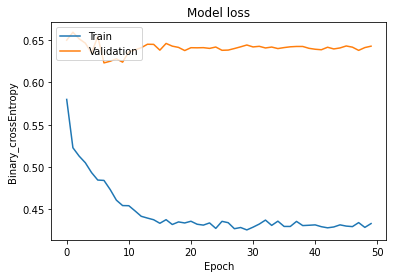

In [26]:
plt.plot(history.history['loss'])                                                                                                                                        
plt.plot(history.history['val_loss'])                                                                                                                                                                                                                                                     
plt.title('Model loss')                                                                                   
plt.ylabel('Binary_crossEntropy')                                                                                                                 
plt.xlabel('Epoch')                                                                      
plt.legend(['Train', 'Validation'], loc='upper left')          
plt.show()  

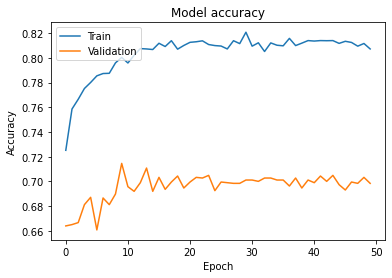

In [27]:
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])         
plt.title('Model accuracy')                           
plt.ylabel('Accuracy')                         
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))        
print('Highest training accuracy: ', max(history.history['accuracy']))
print('Highest validation accuracy: ', max(history.history['val_accuracy']))

Lowest training loss:  0.4259015917778015
Lowest validation loss:  0.6229084730148315
Highest training accuracy:  0.8207679986953735
Highest validation accuracy:  0.7145934104919434
